<font color='blue' size=6>Assignment  on Model Evaluation</font>


***
#### Import libraries here you need to solve this Assignment:

In [1]:
import pandas as pd  # to do data analysis
import numpy as np  # to get the numpy functions
import seaborn as sns  # to do ploting and visulization of data
import matplotlib.pyplot as plt  # to do ploting and visulization of data
from sklearn.model_selection import train_test_split  # to split the data into train cross-validation and test
from sklearn.linear_model import LinearRegression # to get the Linear Regression model
from sklearn.metrics import r2_score # to get the rsquare value
from sklearn.preprocessing import StandardScaler ,MinMaxScaler # to scale the data
from sklearn.preprocessing import PolynomialFeatures # to add the polynomial features in the data
from sklearn.metrics import mean_squared_error # to calculate the mean squared error
from sklearn.linear_model import Lasso # to get the Lasso model
from sklearn.linear_model import Ridge # to get the Ridge model
from scipy import stats  # to get the stats library
from sklearn import linear_model # to get the linear model library

# Load the dataset

In [2]:
df = pd.read_csv('Advertising_data1.csv') # reading csv data file
df  # printing the dataframe

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
73,129.4,5.7,31.3,11.0
74,213.4,24.6,13.1,17.0
75,16.9,43.7,89.4,8.7
76,27.5,1.6,20.7,6.9


In [3]:
df.info() # to get the information of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
TV           78 non-null float64
radio        78 non-null float64
newspaper    78 non-null float64
sales        78 non-null float64
dtypes: float64(4)
memory usage: 2.6 KB


In [4]:
# to check missing values
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

#### There is no missing values in the data set

In [5]:
# to check duplicate rows
df[df.duplicated()]

,TV,radio,newspaper,sales


#### There is no duplicate rows in the data set

In [6]:
# to check variance of the data
df.describe() 

,TV,radio,newspaper,sales
count,78.000000,78.00000,78.000000,78.000000
mean,149.151282,24.54359,31.511538,14.464103
std,86.543707,14.45717,21.979258,5.257425
min,7.300000,1.40000,0.300000,4.800000
25%,69.050000,13.02500,16.075000,10.175000
50%,149.400000,25.15000,28.100000,13.300000
75%,218.000000,36.22500,43.275000,18.375000
max,293.600000,49.60000,114.000000,25.400000


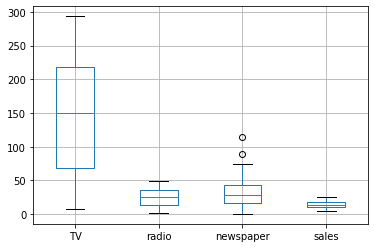

In [7]:
df.boxplot() # to get the symmetry of the data

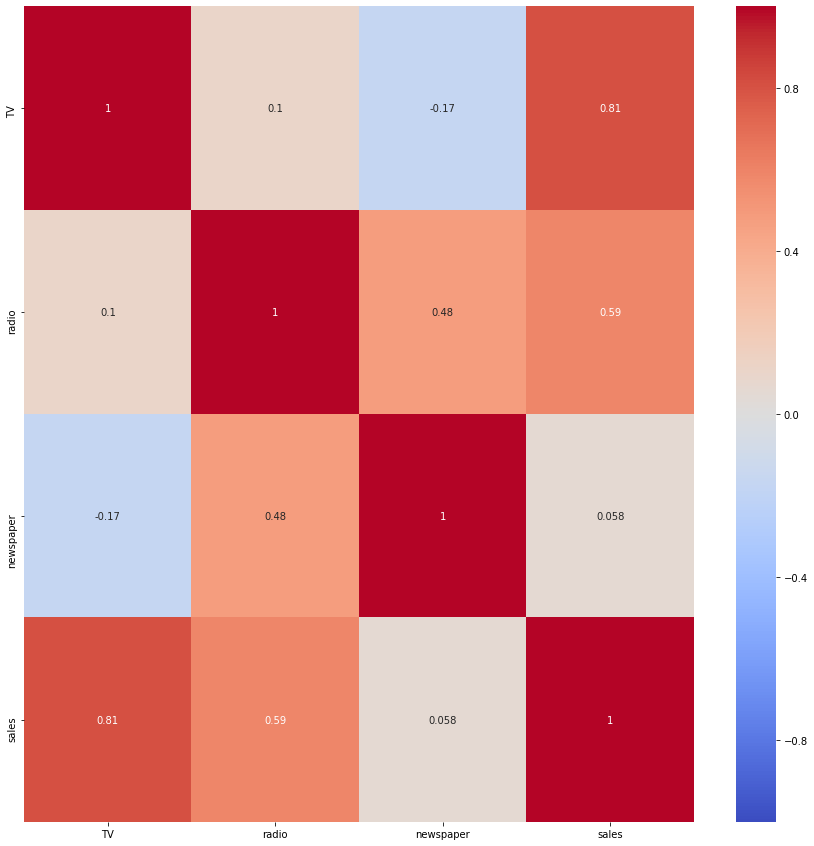

In [8]:
# to get the correlation heatmap of the data
plt.figure(figsize=(15, 15)) 
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

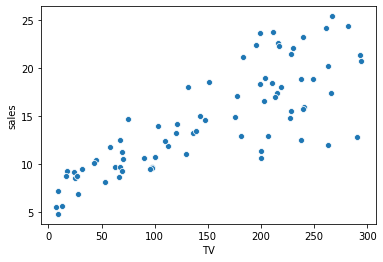

In [9]:
# to plot the scatter graph between TV & sales
sns.scatterplot(data = df, x='TV', y='sales')

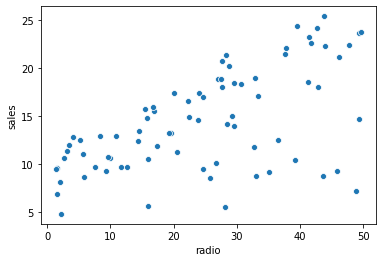

In [10]:
# to plot the scatter graph between radio & sales
sns.scatterplot(data = df, x='radio', y='sales')

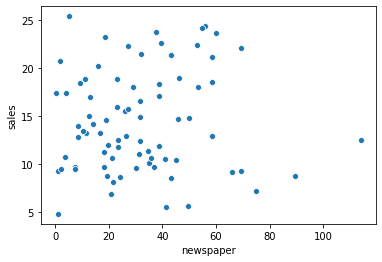

In [11]:
# to plot the scatter graph between newspaper & sales
sns.scatterplot(data = df, x='newspaper', y='sales')

In [12]:
# to get the self defined r square value
def rsquared(ya, y):
    ybar = np.mean(ya)
    sstot=np.sum((ya-ybar)**2)
    ssrss=sum((ya-y)**2)
    return (1-ssrss/sstot)

In [13]:
# to get the self defined r square value
def rsquared1(ya, y):
    ybar = np.mean(ya)
    sstot=np.sum((ya-ybar)**2)
    ssreg=np.sum((y-ybar)**2)
    return (ssreg/sstot)

<a id='question10'></a>
<font color='red' size=5>Question</font>
- Generate 3 different models having your target variable and one independent variable every time. Comment whether the models are overfitting or underfitting. In both such scenarios, use appropriate methods to handle it (Hint : Use PolynomialFeatures from sklearn for underfitting and/or regularization for overfitting models.) If you are using regularization then you'll have to show/use both L1 and L2. Finally, submit your recommendations based on your experience/insights

In [14]:
# Implement your code here and add more cells if you need!

In [15]:
print("Data shape",df.shape)# printing the shape of data

Data shape (78, 4)


In [16]:
# Split data to train test and cross-validation set with random state 1
temp_x,test_x = train_test_split(df, test_size=0.20, random_state=1)
train_x,cv_x = train_test_split(temp_x, test_size=0.25, random_state=1)
# printing the shape of data
print("train_x shape",train_x.shape)
print("cv_x shape",cv_x.shape)
print("test_x shape",test_x.shape)

train_x shape (46, 4)
cv_x shape (16, 4)
test_x shape (16, 4)


#### based on the observation of above table(describe) and boxplot we can say that there are outliers present in the data so to treat them we are scalling the data in the below cells

In [17]:
col = train_x.columns
scaler = StandardScaler()  # to scale the data
train_x= pd.DataFrame(scaler.fit_transform(train_x), columns=col)
train_x

,TV,radio,newspaper,sales
0,0.888399,-0.573277,-0.183548,0.198084
1,0.909355,0.919137,2.003553,1.522715
2,-0.105871,0.312174,-0.875283,0.097733
3,-1.251493,1.026248,0.777759,-0.825495
4,-0.005745,1.169063,1.459320,0.800189
5,0.714926,-0.023440,-0.849851,0.499137
6,0.556588,-1.594403,-0.437862,-0.785355
7,0.994346,-1.415884,-0.320878,-0.404021
8,-1.100141,0.562100,-0.320878,-0.544513
9,0.556588,-1.558699,0.243699,-0.624793


In [18]:
col = cv_x.columns
cv_x= pd.DataFrame(scaler.fit_transform(cv_x), columns=col)# to scale the data
cv_x

,TV,radio,newspaper,sales
0,0.889071,1.284576,-0.137219,1.629071
1,1.439652,-1.264556,-0.968286,-0.333219
2,0.422556,0.730707,-0.174431,0.610902
3,-0.935544,-0.657302,-1.017902,-0.758999
4,0.776586,-0.937573,-0.682995,-0.166610
5,0.467550,-0.777419,0.640097,-0.166610
6,-1.391402,0.844150,0.950197,-0.851560
7,0.912751,0.350339,0.433364,0.777511
8,-0.522312,-1.398019,-0.534147,-0.777511
9,-0.837269,-0.430416,-0.087603,-0.610902


In [19]:
col = test_x.columns
test_x= pd.DataFrame(scaler.fit_transform(test_x), columns=col)# to scale the data
test_x

,TV,radio,newspaper,sales
0,1.014970,0.135318,-0.661635,0.694413
1,-0.324478,0.204051,-0.510404,-0.139770
2,-1.417578,0.011599,0.864852,-1.151439
3,1.045907,-0.606997,-0.099245,0.161956
4,-0.528432,0.279657,-0.784511,-0.175267
5,-0.222501,-1.363058,0.297736,-0.707724
6,1.288818,1.180057,1.403612,1.635087
7,0.573835,1.640567,1.654088,1.546344
8,-0.554786,-1.095000,-1.011357,-0.760970
9,-0.608638,-1.658609,-0.831770,-0.973953


### For Model having your independent variable('TV') and target variable('sales')

In [20]:
# for train set
X = train_x['TV'].values.reshape(-1,1)# to change the shape of data
y = train_x['sales']
reg = LinearRegression() # to get the predefined model method
reg.fit(X,y)
y_pred_TV = reg.predict(X) # to get the predicted values
y_pred_TV

array([ 0.70226022,  0.71882589, -0.08368863, -0.98927841, -0.00454155,
        0.56513332,  0.4399705 ,  0.78600887, -0.86963748,  0.4399705 ,
        1.3032258 , -0.50151155, -0.76196065, -1.27733694, -1.31875111,
        0.80349485,  0.69213676,  1.01884852, -0.29260009,  1.29678359,
        0.28167635, -0.76380128,  0.464819  ,  0.54120513,  0.4335283 ,
       -0.19228578,  0.57709741,  0.59642402, -0.71134333, -0.57329611,
       -1.31967142, -0.04319478,  0.89092476,  0.69949928, -1.15217413,
       -0.35978307,  1.27653667,  0.21265274, -0.14534972,  0.80901674,
       -1.14573192, -1.10891933, -0.38831283, -1.24328529,  0.47954404,
       -0.78312789])

In [21]:
print("R2_score Train = ", r2_score(y,y_pred_TV)) # to get the r square value

R2_score Train =  0.6248563482770952


In [22]:
# for cross-validation set
X1 = cv_x['TV'].values.reshape(-1,1)# to change the shape of data
y1 = cv_x['sales']

In [23]:
y_pred1 = reg.predict(X1) # to get the predicted values
y_pred1

array([ 0.70279119,  1.13801398,  0.33402178, -0.73952774,  0.61387471,
        0.36958838, -1.09987348,  0.72151045, -0.41287666, -0.66184281,
       -0.01883625, -1.25430737,  1.31116712, -0.68804978, -0.82189248,
        0.50623897])

In [24]:
print("R2_score CV = ", r2_score(y1,y_pred1)) # to get the r square value

R2_score CV =  0.6164505749598289


#### Based on the observation of R square of training set and cross validation set we can say that this model is already close to it's best fit therfore we do not require to use any appropriate methods to handle it.

#### now as we know that our model is best fit we can do the predictions for the test set

In [25]:
 # For test Set 
Xt = test_x['TV'].values.reshape(-1,1)
yt = test_x['sales']

In [26]:
y_predt = reg.predict(Xt) # to get the predicted values
y_predt

array([ 0.80231228, -0.25649312, -1.12056527,  0.82676715, -0.41771413,
       -0.17588261,  1.01878319,  0.45360392, -0.43854606, -0.48111565,
       -0.95753279,  1.05772984, -0.74921351,  0.56048077,  1.0695044 ,
       -1.19211842])

In [27]:
print("R2_score Test = ", r2_score(yt,y_predt)) # to get the r square value

R2_score Test =  0.7547234550253009


#### Based on the R square of the test set we can say that our model is predicting values very well

### For Model having your independent variable('radio') and target variable('sales')

In [28]:
# for train set
X = train_x['radio'].values.reshape(-1,1)# to change the shape of data
y = train_x['sales']
reg = LinearRegression() # to get the predefined model method
reg.fit(X,y)
y_pred_radio = reg.predict(X) # to get the predicted values
y_pred_radio

array([-0.31099996,  0.49862734,  0.16935308,  0.55673457,  0.63421086,
       -0.01271622, -0.86495549, -0.76811011,  0.3049366 , -0.84558641,
        0.10737204, -0.67126474, -0.17154263, -0.34973811,  0.92862079,
       -0.36523337, -0.35361193,  0.14998401, -0.20640696,  0.13061493,
        0.82402779, -0.60540989, -0.10181396,  0.95573749,  0.21971267,
        0.69231808, -0.03595911,  0.73493005,  0.94798987, -0.582167  ,
       -0.88432456, -0.03983292,  0.08412915,  0.49475353,  0.31268423,
       -0.29163089, -0.80684826, -0.09406633, -0.22190222,  0.64195849,
       -0.90369363, -0.01271622, -0.41171915,  0.72718242,  0.30881041,
       -0.51243833])

In [29]:
print("R2_score Train = ", r2_score(y,y_pred_radio)) # to get the r square value

R2_score Train =  0.294300891468359


In [30]:
# for cross-validation set
X2 = cv_x['radio'].values.reshape(-1,1)# to change the shape of data
y2 = cv_x['sales']

In [31]:
y_pred2 = reg.predict(X2) # to get the predicted values
y_pred2

array([ 0.69687597, -0.68601556,  0.39640477, -0.35658329, -0.50862895,
       -0.42174572,  0.45794706,  0.19005708, -0.75841826, -0.2334987 ,
       -0.28780072,  0.20453762,  0.62085314,  0.51224909, -0.74031759,
        0.91408406])

In [32]:
X2=np.array(X2)
X2

array([[ 1.28457569],
       [-1.26455633],
       [ 0.73070669],
       [-0.65730237],
       [-0.93757343],
       [-0.77741853],
       [ 0.84414974],
       [ 0.35033882],
       [-1.39801874],
       [-0.43041627],
       [-0.53051308],
       [ 0.37703131],
       [ 1.14444016],
       [ 0.94424655],
       [-1.36465314],
       [ 1.68496292]])

In [33]:
print("R2_score Cv = ", r2_score(y2,y_pred2)) # to get the r square value

R2_score Cv =  0.40073619551153195


#### Based on the observation of R square of training set and cross validation set we can say that this model is underfitted therfore we require to use any appropriate methods to handle it.

#### Therefore to handle this we are adding the polynomial features to the data and increasing their degree one at a time till we get  the highest R square of the training set

In [34]:
degree = 1
while degree<=25 :
    coef = PolynomialFeatures(degree)
    X_poly3 = coef.fit_transform(X) #  PolynomialFeatures is used to transform the input
    reg = LinearRegression() # to get the predefined model method
    reg.fit(X_poly3,y)
    y_pred_radio = reg.predict(X_poly3) # to get the predicted values
    print("r2_score train    :"+str(r2_score(y,y_pred_radio))) # to get the r square value
    print("r2_score cv    :"+str(r2_score(y2,y_pred2)))
    print("Intercept    :",reg.intercept_)
    print("Coefficients :",reg.coef_)
    print("degree :",degree)
    print("_______________________________________________________________________________________")
    degree=degree+1
    

r2_score train    :0.294300891468359
r2_score cv    :0.40073619551153195
Intercept    : -5.570668040027722e-16
Coefficients : [0.         0.54249506]
degree : 1
_______________________________________________________________________________________
r2_score train    :0.3397886790364196
r2_score cv    :0.40073619551153195
Intercept    : 0.2136204196212404
Coefficients : [ 0.          0.55540982 -0.21362042]
degree : 2
_______________________________________________________________________________________
r2_score train    :0.3530359092114893
r2_score cv    :0.40073619551153195
Intercept    : 0.21371489317248546
Coefficients : [ 0.          0.82476456 -0.2055599  -0.13489014]
degree : 3
_______________________________________________________________________________________
r2_score train    :0.35308747160597653
r2_score cv    :0.40073619551153195
Intercept    : 0.220678176416994
Coefficients : [ 0.          0.82841035 -0.23145944 -0.13707807  0.00953209]
degree : 4
______________________

In [35]:
# for test set
Xt2 = test_x['radio'].values.reshape(-1,1)# to change the shape of data
yt2 = test_x['sales']

#### therefore after applying the analysis we get the maximum R Square for training set after adding degree 24 polynomials

#### now after adding polynomial still 24 degree our model is overfitting based on the observation of R square of training set and cross validation set herfore we require to use any appropriate methods to handle it.

C:\Users\Akshat\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.179496731200905, tolerance: 0.0046
  positive)


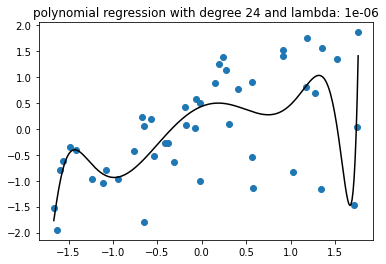

C:\Users\Akshat\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.18100804094601, tolerance: 0.0046
  positive)


r2_score_train:  0.470465356594038
intercept:  0.4341049171105265
coiffecients:  [ 0.00000000e+00  6.91919437e-01 -1.92422505e+00 -1.07697677e-01
  1.30464179e+00  1.85246625e-01  1.23741772e-02 -4.44868699e-02
 -3.73045700e-02 -1.88101776e-02 -1.77813657e-02 -4.36044580e-03
 -5.62810832e-03 -5.95036761e-04 -1.37253995e-03  4.84511937e-05
 -2.33363852e-04  7.34284229e-05 -9.42762976e-08  3.51474033e-05
  2.41013075e-05  1.29360627e-05  1.50711718e-05  4.14080318e-06
  6.98679001e-06]
r2_score_cv:  -0.16783896543536336


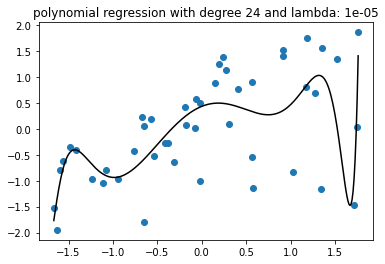

r2_score_train:  0.470477847450804
intercept:  0.433945233305068
coiffecients:  [ 0.00000000e+00  6.91887876e-01 -1.92293724e+00 -1.07892500e-01
  1.30304757e+00  1.85552857e-01  1.29341481e-02 -4.45746265e-02
 -3.73197276e-02 -1.88182785e-02 -1.77869966e-02 -4.36007489e-03
 -5.62955159e-03 -5.94673892e-04 -1.37286515e-03  4.85787120e-05
 -2.33432363e-04  7.34630076e-05 -1.06806079e-07  3.51545897e-05
  2.41006619e-05  1.29368530e-05  1.50719001e-05  4.14061016e-06
  6.98727958e-06]
r2_score_cv:  -0.1678134337761359


C:\Users\Akshat\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.187714719095647, tolerance: 0.0046
  positive)


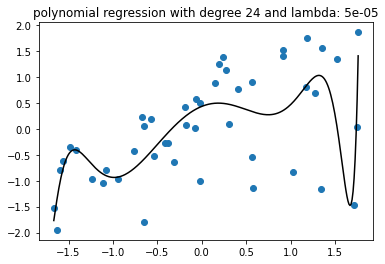

r2_score_train:  0.47053304210071145
intercept:  0.4332332386075655
coiffecients:  [ 0.00000000e+00  6.91729847e-01 -1.91720466e+00 -1.08714960e-01
  1.29597124e+00  1.86885366e-01  1.54038030e-02 -4.49570617e-02
 -3.73810565e-02 -1.88553100e-02 -1.78118649e-02 -4.35845088e-03
 -5.63599284e-03 -5.93052811e-04 -1.37432268e-03  4.91490381e-05
 -2.33740607e-04  7.36178700e-05 -1.63559199e-07  3.51868725e-05
  2.40974934e-05  1.29404670e-05  1.50750544e-05  4.13978153e-06
  6.98943276e-06]
r2_score_cv:  -0.1676984454597803


C:\Users\Akshat\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.196070878104502, tolerance: 0.0046
  positive)


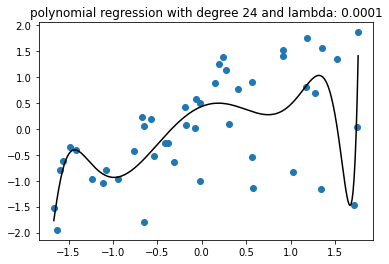

C:\Users\Akshat\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.261820588470133, tolerance: 0.0046
  positive)


r2_score_train:  0.47060141784061926
intercept:  0.43233904545646135
coiffecients:  [ 0.00000000e+00  6.91503404e-01 -1.91002417e+00 -1.09672310e-01
  1.28715118e+00  1.88502168e-01  1.84473728e-02 -4.54195653e-02
 -3.74445539e-02 -1.89040827e-02 -1.78425822e-02 -4.35655406e-03
 -5.64408319e-03 -5.91018063e-04 -1.37616827e-03  4.98700040e-05
 -2.34134151e-04  7.38144295e-05 -2.36951670e-07  3.52281855e-05
  2.40928218e-05  1.29452801e-05  1.50787958e-05  4.13883350e-06
  6.99206776e-06]
r2_score_cv:  -0.1675515793252529


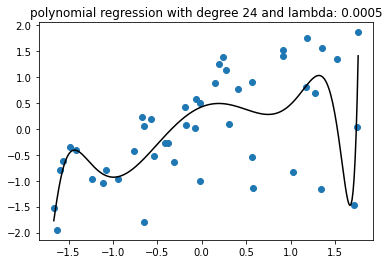

r2_score_train:  0.47111614885999364
intercept:  0.4250927615416334
coiffecients:  [ 0.00000000e+00  6.88432814e-01 -1.85240833e+00 -1.14125282e-01
  1.21768124e+00  1.99175801e-01  4.13211775e-02 -4.84735893e-02
 -3.75113117e-02 -1.93751834e-02 -1.80790965e-02 -4.34382324e-03
 -5.71137130e-03 -5.74279280e-04 -1.39190727e-03  5.58736940e-05
 -2.37560066e-04  7.54615937e-05 -8.94952427e-07  3.55797508e-05
  2.40378549e-05  1.29895507e-05  1.51045993e-05  4.13272928e-06
  7.01223786e-06]
r2_score_cv:  -0.16629116815178446


C:\Users\Akshat\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.340792068920303, tolerance: 0.0046
  positive)


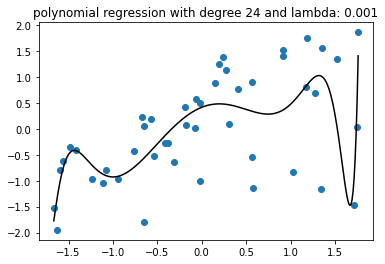

r2_score_train:  0.4716704887442381
intercept:  0.4159681459008436
coiffecients:  [ 0.00000000e+00  6.82045771e-01 -1.78087093e+00 -1.13129926e-01
  1.13360931e+00  2.07816916e-01  6.70474662e-02 -5.09780383e-02
 -3.67777741e-02 -2.01112749e-02 -1.83637107e-02 -4.33141024e-03
 -5.80167719e-03 -5.52301135e-04 -1.41362836e-03  6.38347522e-05
 -2.42371640e-04  7.76417233e-05 -1.83212133e-06  3.60451932e-05
  2.39474626e-05  1.30493180e-05  1.51342961e-05  4.12520784e-06
  7.03782269e-06]
r2_score_cv:  -0.16463586831677746


C:\Users\Akshat\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.783755108549506, tolerance: 0.0046
  positive)


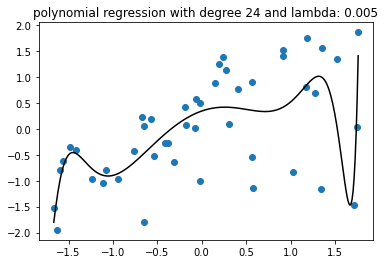

C:\Users\Akshat\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.035892279661583, tolerance: 0.0046
  positive)


r2_score_train:  0.4730359912075077
intercept:  0.3442658279849398
coiffecients:  [ 0.00000000e+00  5.96964177e-01 -1.23261934e+00 -1.94348427e-03
  5.19382291e-01  1.90053168e-01  2.26557181e-01 -4.45017551e-02
 -1.86061001e-02 -2.83409460e-02 -2.06376172e-02 -4.30707616e-03
 -6.65426476e-03 -3.68168336e-04 -1.62341395e-03  1.31798855e-04
 -2.88786083e-04  9.57400350e-05 -1.04475133e-05  3.96478769e-05
  2.32105474e-05  1.34053419e-05  1.54712147e-05  3.99543694e-06
  7.30194459e-06]
r2_score_cv:  -0.15355529591273753


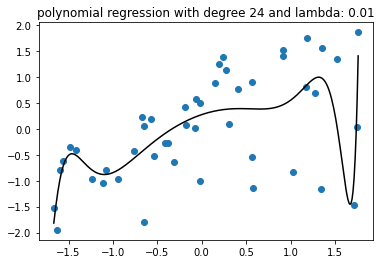

C:\Users\Akshat\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.567582346808518, tolerance: 0.0046
  positive)


r2_score_train:  0.47183869940603473
intercept:  0.27496060426371616
coiffecients:  [ 0.00000000e+00  5.75172076e-01 -7.38665028e-01 -0.00000000e+00
 -0.00000000e+00  1.82645447e-01  3.48913968e-01 -1.56843756e-02
  9.00074503e-05 -3.93773917e-02 -2.23874135e-02 -4.84119014e-03
 -7.40941518e-03 -2.79827615e-04 -1.81195797e-03  1.85341817e-04
 -3.31001197e-04  1.12397450e-04 -1.79948068e-05  4.31837195e-05
  2.25923166e-05  1.38996153e-05  1.58399201e-05  3.92528185e-06
  7.57556595e-06]
r2_score_cv:  -0.14743658871064658


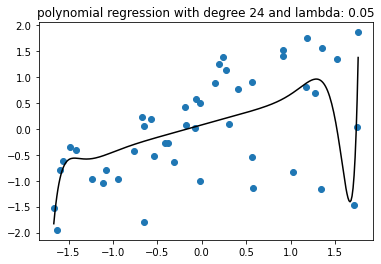

C:\Users\Akshat\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.756907033088684, tolerance: 0.0046
  positive)


r2_score_train:  0.4328543876230895
intercept:  0.07558628665964619
coiffecients:  [ 0.00000000e+00  4.76396546e-01 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  2.10343467e-02  0.00000000e+00  9.31950417e-02
  4.01268957e-02 -1.17256870e-02 -0.00000000e+00 -2.00503815e-02
 -5.34747205e-03 -2.00862274e-03 -1.71611423e-03  3.11591026e-05
 -3.70092299e-04  1.50792682e-04 -5.29395157e-05  6.75958999e-05
  8.64558841e-06  2.35846239e-05  1.12610479e-05  7.21108652e-06
  6.14754956e-06]
r2_score_cv:  -0.09225622632830888


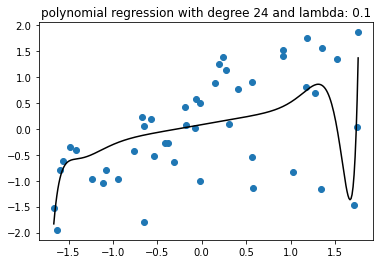

C:\Users\Akshat\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.972637912714802, tolerance: 0.0046
  positive)


r2_score_train:  0.4116872867685517
intercept:  0.08127276664348718
coiffecients:  [ 0.00000000e+00  2.98852907e-01 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  2.36813671e-02  0.00000000e+00  1.09438241e-01
  2.59529076e-02  7.29515002e-04  4.51440442e-03 -2.11407542e-02
 -4.60948324e-03 -3.93504377e-03 -1.63174199e-03 -1.82219405e-04
 -3.58144127e-04  1.46584185e-04 -5.55039521e-05  7.91075297e-05
  4.74685733e-06  2.93758891e-05  9.65597155e-06  9.33914563e-06
  5.55444823e-06]
r2_score_cv:  -0.07619427031136028


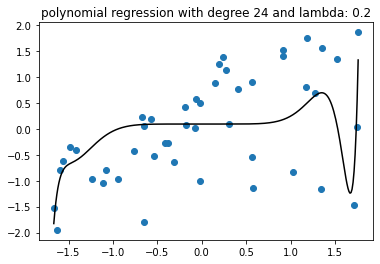

C:\Users\Akshat\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.324769141114118, tolerance: 0.0046
  positive)


r2_score_train:  0.3394294263402866
intercept:  0.09306670064200302
coiffecients:  [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.65998325e-01
  1.93397014e-03  4.78543138e-04  9.85235633e-03 -1.35929282e-02
 -2.38560358e-03 -8.20581701e-03 -1.41293377e-03 -6.34171867e-04
 -3.65764133e-04  1.05830418e-04 -5.50494014e-05  9.58295908e-05
 -1.58911002e-06  3.95517601e-05  6.49938506e-06  1.34658211e-05
  4.30836487e-06]
r2_score_cv:  -0.08477329686429536


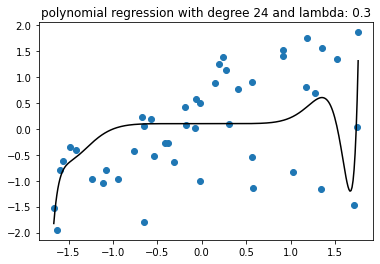

C:\Users\Akshat\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.62553004055613, tolerance: 0.0046
  positive)


r2_score_train:  0.32748965240676675
intercept:  0.10054690656252065
coiffecients:  [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.06835790e-01
  0.00000000e+00  1.43829850e-02  9.11887507e-03  0.00000000e+00
 -1.70526515e-03 -1.08675272e-02 -1.52887564e-03 -1.03583704e-03
 -3.60292612e-04  2.93926764e-05 -4.04013157e-05  9.42802196e-05
 -4.33228887e-07  4.27258972e-05  6.08695935e-06  1.52805215e-05
  3.93257801e-06]
r2_score_cv:  -0.10380903551984821


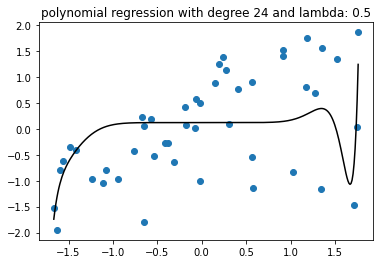

C:\Users\Akshat\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.580472744571964, tolerance: 0.0046
  positive)


r2_score_train:  0.2910577470179625
intercept:  0.12087419320735154
coiffecients:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.23304126e-02  5.24852917e-03  0.00000000e+00
  0.00000000e+00 -6.25281035e-03 -2.02863350e-03 -1.86896156e-03
 -3.38758585e-04 -1.08620010e-04 -3.92235418e-05  5.80052591e-05
  9.10390305e-06  3.75657449e-05  8.22229914e-06  1.49306940e-05
  4.27267082e-06]
r2_score_cv:  -0.13939092604211112


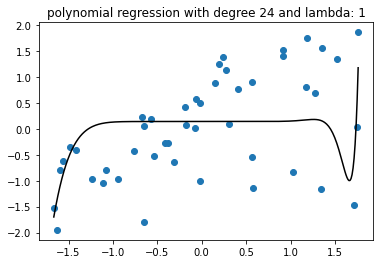

r2_score_train:  0.24560358460182408
intercept:  0.14203978788072633
coiffecients:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.21453822e-02
  0.00000000e+00  0.00000000e+00 -4.55577377e-04 -2.09994912e-03
 -7.59397729e-04 -2.32104026e-04 -7.87191826e-05  1.17621327e-05
  1.64822871e-05  2.60503801e-05  1.20455651e-05  1.15597643e-05
  5.62351393e-06]
r2_score_cv:  -0.20131210317438875


In [36]:
#using l1 regularization on our model
lambdas=[0.000001,0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.2,0.3,0.5,1]
for i in lambdas:
    dgr=24
    coeff_l=PolynomialFeatures(dgr)
    X_poly=coeff_l.fit_transform(X) #  PolynomialFeatures is used to transform the input
    l_reg=linear_model.Lasso(alpha=i) # to get the predefined model method
    l_reg.fit(X_poly,y)
    x_seq=np.linspace(X.min(),X.max(),300).reshape(-1,1)
    plt.figure()
    plt.scatter(X,y)
    plt.plot(x_seq,l_reg.predict(coeff_l.fit_transform(x_seq)),color="black")
    plt.title("polynomial regression with degree "+str(dgr)+" and lambda: "+str(i))
    plt.show()
    y_pred=l_reg.predict(coeff_l.fit_transform(X)) # to get the predicted values
    print("r2_score_train: ",str(r2_score(y,y_pred))) # to get the r square value
    print("intercept: ",l_reg.intercept_)
    print("coiffecients: ",l_reg.coef_)
    y_pred1=l_reg.predict(coeff_l.fit_transform(X2)) # to get the predicted values
    print("r2_score_cv: ",str(r2_score(y2,y_pred1))) # to get the r square value

C:\Users\Akshat\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.32073e-19): result may not be accurate.
  overwrite_a=True).T


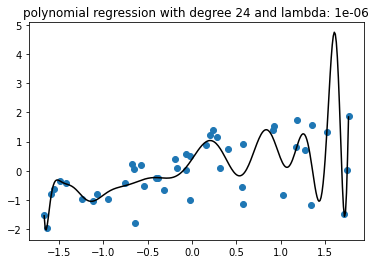

C:\Users\Akshat\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.73842e-18): result may not be accurate.
  overwrite_a=True).T


r2_score_train:  0.6540609477967524
intercept:  0.40039851402980214
coiffecients:  [ 0.00000000e+00  4.51529650e+00  2.14268177e+00 -3.90937087e+01
 -5.41403097e+01  1.05722804e+02  2.07792043e+02 -5.52044912e+01
 -2.84233448e+02 -1.32611331e+02  8.88110115e+01  1.56063904e+02
  1.31520882e+02  4.65803568e+01 -1.16399784e+02 -1.76042292e+02
  6.53004380e+00  1.28426686e+02  2.93947662e+01 -4.51772481e+01
 -1.47612465e+01  8.01320916e+00  2.93981014e+00 -5.76057040e-01
 -2.17427585e-01]
r2_score_cv:  -0.023132865966690064


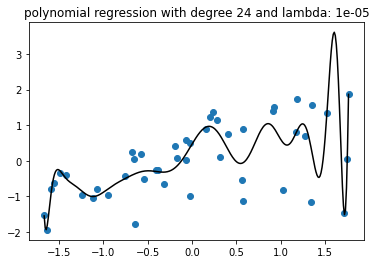

r2_score_train:  0.6404384652570321
intercept:  0.4680462910182535
coiffecients:  [  0.           4.1757685   -1.78792342 -34.29852278 -16.69863239
  96.6458684   77.63219556 -85.20771823 -90.26244984 -33.35106968
 -12.80404988  79.14075507  73.38270373   9.44863864  -2.17278987
 -77.67392712 -65.43204087  59.50792251  53.93791343 -21.10348798
 -19.66738562   3.72046598   3.50235892  -0.2639711   -0.24783227]
r2_score_cv:  0.03111206659722865


C:\Users\Akshat\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.22877e-17): result may not be accurate.
  overwrite_a=True).T


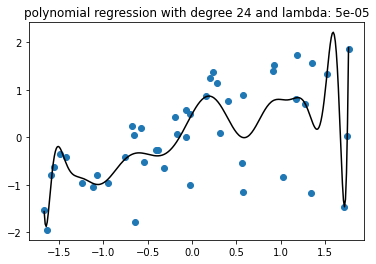

C:\Users\Akshat\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.41861e-17): result may not be accurate.
  overwrite_a=True).T


r2_score_train:  0.6164541122396211
intercept:  0.49312719762383433
coiffecients:  [  0.           3.38596382  -3.61880508 -22.17286896   1.11987491
  51.45315116  21.44791302 -35.95368782 -31.76019882 -17.72831193
  -3.93583341  28.63892634  28.53669172   7.40023184  -0.68157516
 -27.5277437  -28.23707197  18.32754877  24.08442867  -5.80221907
  -9.07652111   0.91571986   1.66753585  -0.05792548  -0.12153434]
r2_score_cv:  -0.0072739248899065245


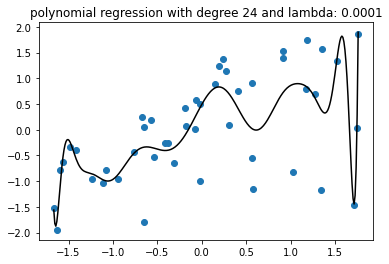

r2_score_train:  0.6068142403541581
intercept:  0.49006460892269327
coiffecients:  [ 0.00000000e+00  3.08934540e+00 -3.76236243e+00 -1.79795178e+01
  3.99969043e+00  3.64506422e+01  9.88942217e+00 -1.98110988e+01
 -1.84820048e+01 -1.38871437e+01 -1.24394062e+00  1.44456159e+01
  1.67949927e+01  6.65348217e+00 -1.07182353e+00 -1.38647754e+01
 -1.67355005e+01  7.54170922e+00  1.47670843e+01 -1.95551106e+00
 -5.67898529e+00  2.41554652e-01  1.05834365e+00 -1.08004714e-02
 -7.78847369e-02]
r2_score_cv:  -0.03386873254819167


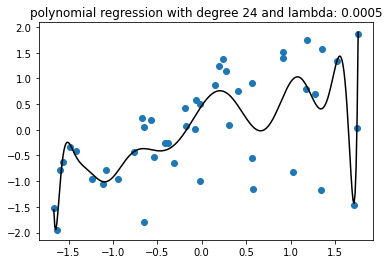

r2_score_train:  0.5928397981661833
intercept:  0.46831101741827236
coiffecients:  [ 0.00000000e+00  2.51354289e+00 -3.32138167e+00 -1.13586817e+01
  4.13521232e+00  1.63242337e+01  2.06669745e+00 -2.16423413e+00
 -5.08378065e+00 -6.82415011e+00 -7.66087919e-01  3.74974383e-01
  3.94933178e+00  3.09099418e+00  2.53885550e-01 -8.70583177e-01
 -3.67736742e+00 -2.42579533e-01  2.73115995e+00  5.86884685e-02
 -8.73755802e-01  2.88304312e-02  1.24021596e-01 -6.86420024e-03
 -5.49003034e-03]
r2_score_cv:  -0.07599901001320908


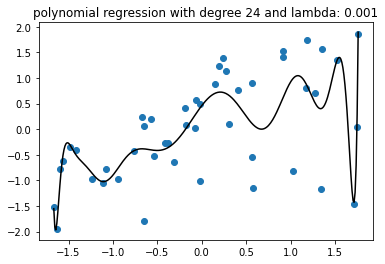

r2_score_train:  0.5887644579197231
intercept:  0.45900677865029077
coiffecients:  [ 0.00000000e+00  2.27122367e+00 -3.12834235e+00 -9.19695890e+00
  3.71189790e+00  1.13461129e+01  1.53312273e+00  5.04142907e-01
 -3.19553356e+00 -4.39169157e+00 -1.10408013e+00 -1.26568665e+00
  2.01755090e+00  1.44363295e+00  7.96096088e-01  4.69561870e-01
 -1.66339219e+00 -3.88193737e-02  5.80756831e-01 -3.82213680e-01
  6.53634707e-02  1.71596825e-01 -7.23919606e-02 -2.18323045e-02
  1.07368707e-02]
r2_score_cv:  -0.08137180915640418


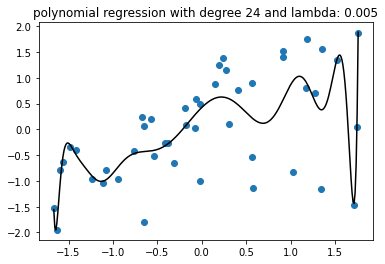

r2_score_train:  0.579232728240038
intercept:  0.42284495054809607
coiffecients:  [ 0.          1.68474869 -2.49676823 -5.08722765  2.57081321  4.45823777
  0.9337867   2.05723632 -1.24083145 -0.985871   -0.93009364 -1.64843107
  0.41173064 -0.6021766   0.73849451  0.74416064 -0.19540602  0.9464622
 -0.53461356 -0.98941283  0.44645167  0.31205488 -0.13644334 -0.03363244
  0.01503896]
r2_score_cv:  -0.06835672871815723


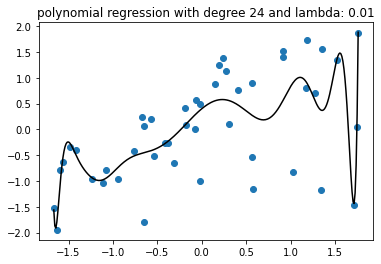

r2_score_train:  0.5735727630672963
intercept:  0.3999619217338471
coiffecients:  [ 0.          1.42483577 -2.1055205  -3.61174319  1.84702633  2.80710269
  0.79522944  1.74422449 -0.6450116  -0.36885503 -0.62187152 -1.25067334
  0.10713501 -0.72251531  0.37968209  0.51211863 -0.05295762  0.91498502
 -0.26479565 -0.84527324  0.22208226  0.25481489 -0.07265948 -0.02675652
  0.00863244]
r2_score_cv:  -0.05537971826225929


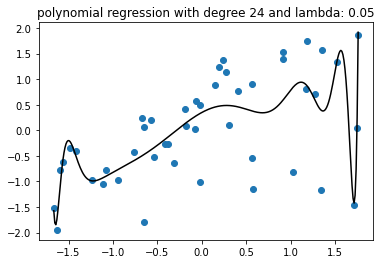

r2_score_train:  0.5594101777096261
intercept:  0.3464773569302218
coiffecients:  [ 0.          0.94264565 -1.34157444 -1.17973229  0.61891903  0.77382227
  0.58093631  0.71069611  0.13197435  0.07166092 -0.13236668 -0.40375397
 -0.21323322 -0.39184139 -0.16344326  0.09595409  0.04081619  0.41557615
  0.22587586 -0.30744147 -0.14231492  0.08352308  0.02791897 -0.00827585
 -0.00138175]
r2_score_cv:  -0.017316967204955125


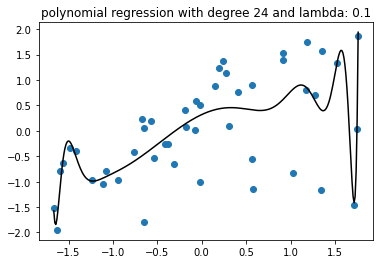

r2_score_train:  0.5543087450980335
intercept:  0.32033726120061995
coiffecients:  [ 0.          0.8138469  -1.07471555 -0.60349849  0.35304282  0.42542912
  0.46155893  0.41845365  0.20256358  0.07011041 -0.04472489 -0.22410565
 -0.20137483 -0.24959909 -0.19607021  0.03235112  0.02891461  0.25217364
  0.23217977 -0.17170398 -0.13816687  0.044951    0.02572244 -0.00444047
 -0.00112119]
r2_score_cv:  -2.8813834936913807e-05


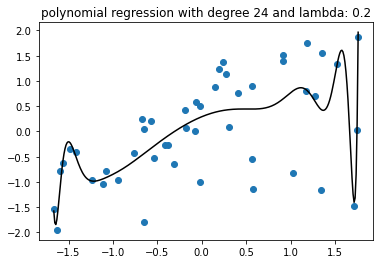

r2_score_train:  0.5495526440607759
intercept:  0.2912105507754739
coiffecients:  [ 0.00000000e+00  7.23770198e-01 -8.21458144e-01 -2.39964892e-01
  1.74624855e-01  2.45856652e-01  3.25350495e-01  2.33297035e-01
  1.90515033e-01  4.12004153e-02  6.09150178e-03 -1.29496963e-01
 -1.43625177e-01 -1.52017777e-01 -1.66218891e-01  1.02500502e-02
  2.21795146e-03  1.48067096e-01  1.73723855e-01 -9.60764911e-02
 -8.37503880e-02  2.52190034e-02  9.39234150e-03 -2.62437128e-03
  5.55795210e-04]
r2_score_cv:  0.01486831904704422


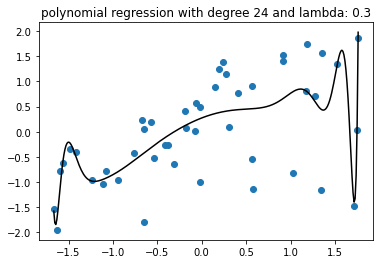

r2_score_train:  0.5468875102708239
intercept:  0.2736783604309772
coiffecients:  [ 0.          0.68318387 -0.68531576 -0.10120139  0.10036148  0.18737414
  0.24944968  0.16401074  0.16577132  0.02499049  0.02359169 -0.0972547
 -0.10532554 -0.11328397 -0.13798838  0.00496889 -0.01310794  0.10718916
  0.13157374 -0.06788243 -0.04751406  0.01808975 -0.00109982 -0.00198641
  0.00160876]
r2_score_cv:  0.021501551083371928


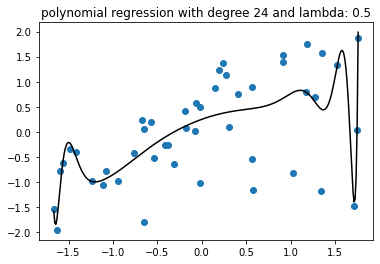

r2_score_train:  0.5436707793942188
intercept:  0.25190457743266786
coiffecients:  [ 0.          0.63772335 -0.53312183  0.01712501  0.03407864  0.14350111
  0.16741478  0.10796806  0.12915472  0.0113826   0.03467492 -0.06988818
 -0.06392461 -0.07999393 -0.10261066 -0.00067571 -0.02692165  0.07000018
  0.08428495 -0.04066178 -0.00961523  0.01078587 -0.01161047 -0.00128839
  0.0026258 ]
r2_score_cv:  0.0273154333002833


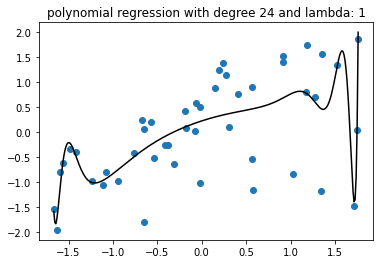

r2_score_train:  0.5393350029788772
intercept:  0.22361386853270857
coiffecients:  [ 0.00000000e+00  5.73784056e-01 -3.65030232e-01  1.08889456e-01
 -1.51861171e-02  1.17827551e-01  8.66588762e-02  7.27565772e-02
  8.19685708e-02  6.79516837e-03  3.38643539e-02 -4.58050756e-02
 -2.80961783e-02 -5.57097105e-02 -6.43728941e-02 -1.10850020e-02
 -3.30707033e-02  3.69933232e-02  4.06085543e-02 -1.11912180e-02
  2.00540770e-02  1.70731080e-03 -1.88450726e-02 -3.10222868e-04
  3.23886728e-03]
r2_score_cv:  0.03199193278122381


In [37]:

#using l2 regularization on our model
lambdas=[0.000001,0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.2,0.3,0.5,1]
for i in lambdas:
    dgr=24
    coeff_l=PolynomialFeatures(dgr)
    X_poly=coeff_l.fit_transform(X) #  PolynomialFeatures is used to transform the input
    l_reg=linear_model.Ridge(alpha=i) # to get the predefined model method
    l_reg.fit(X_poly,y)
    x_seq=np.linspace(X.min(),X.max(),300).reshape(-1,1)
    plt.figure()
    plt.scatter(X,y)
    plt.plot(x_seq,l_reg.predict(coeff_l.fit_transform(x_seq)),color="black")
    plt.title("polynomial regression with degree "+str(dgr)+" and lambda: "+str(i))
    plt.show()
    y_pred=l_reg.predict(coeff_l.fit_transform(X)) # to get the predicted values
    print("r2_score_train: ",str(r2_score(y,y_pred))) # to get the r square value
    print("intercept: ",l_reg.intercept_)
    print("coiffecients: ",l_reg.coef_)
    y_pred2=l_reg.predict(coeff_l.fit_transform(X2)) # to get the predicted values
    print("r2_score_cv: ",str(r2_score(y2,y_pred2))) # to get the r square value

C:\Users\Akshat\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.73842e-18): result may not be accurate.
  overwrite_a=True).T


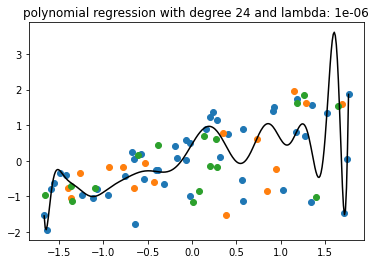

r2_score_train:  0.6404384652570321
intercept:  0.4680462910182535
coiffecients:  [  0.           4.1757685   -1.78792342 -34.29852278 -16.69863239
  96.6458684   77.63219556 -85.20771823 -90.26244984 -33.35106968
 -12.80404988  79.14075507  73.38270373   9.44863864  -2.17278987
 -77.67392712 -65.43204087  59.50792251  53.93791343 -21.10348798
 -19.66738562   3.72046598   3.50235892  -0.2639711   -0.24783227]
r2_score_cv:  0.03111206659722865
r2_score_test:  0.21876880808882304


In [38]:
# for lambda 0.00001
dgr=24
coeff_l=PolynomialFeatures(dgr)
X_poly=coeff_l.fit_transform(X) #  PolynomialFeatures is used to transform the input
l_reg=linear_model.Ridge(alpha=0.00001) # to get the predefined model method
l_reg.fit(X_poly,y)
x_seq=np.linspace(X.min(),X.max(),300).reshape(-1,1)
plt.figure()
plt.scatter(X,y)
plt.scatter(X2,y2)
plt.scatter(Xt2,yt2)
plt.plot(x_seq,l_reg.predict(coeff_l.fit_transform(x_seq)),color="black")
plt.title("polynomial regression with degree "+str(dgr)+" and lambda: "+str(0.000001))
plt.show()
y_pred=l_reg.predict(coeff_l.fit_transform(X)) # to get the predicted values
print("r2_score_train: ",str(rsquared(y,y_pred)))
print("intercept: ",l_reg.intercept_)
print("coiffecients: ",l_reg.coef_)
y_pred2=l_reg.predict(coeff_l.fit_transform(X2)) # to get the predicted values
print("r2_score_cv: ",str(rsquared(y2,y_pred2))) # to get the r square value
y_predt2=l_reg.predict(coeff_l.fit_transform(Xt2)) # For test Set 
print("r2_score_test: ",str(rsquared(yt2,y_predt2))) # to get the r square value

#### Based on the observation of L1 and L2 regularization we can say that in this model a straight line can protect more accurately than our polynomial regression line therefore we can say that  we can not fit the model as per desired requirements based on only this data we require more data or information.

#### and at present we can in predicted 2 percent of test set and 3 percent of cross-validation

### For Model having your independent variable('newspaper') and target variable('sales')

In [39]:
# for train set
X = train_x['newspaper'].values.reshape(-1,1)# to change the shape of data
y = train_x['sales']
reg = LinearRegression() # to get the predefined model method
reg.fit(X,y)
y_pred_news = reg.predict(X) # to get the predicted values
y_pred_news

array([-0.01388886,  0.15160611, -0.06623146,  0.05885195,  0.1104248 ,
       -0.06430709, -0.03313246, -0.0242804 , -0.0242804 ,  0.01844039,
       -0.10779763, -0.08701454, -0.04429375,  0.07617119,  0.17392869,
       -0.00965527,  0.07732581, -0.05353068, -0.07008018,  0.05153938,
        0.11119455, -0.11126148,  0.00689423,  0.03037142,  0.03422014,
       -0.00349732, -0.09933045, -0.01004014,  0.06116118,  0.02267398,
       -0.11087661, -0.04121477, -0.02658964,  0.00843372, -0.04044503,
        0.03383527, -0.08201121,  0.00650936, -0.05083657, -0.04352401,
       -0.03505682, -0.10625815,  0.0072791 ,  0.22935026,  0.0623158 ,
        0.02690757])

In [40]:
print("R2_score = ", r2_score(y,y_pred_news)) # to get the r square value

R2_score =  0.005725743999515753


In [41]:
# for cross-validation set
X3 = cv_x['newspaper'].values.reshape(-1,1)
y3 = cv_x['sales']

In [42]:
y_pred3 = reg.predict(X3) # to get the predicted values
y_pred3

array([-0.01038318, -0.07326891, -0.01319896, -0.07702328, -0.05168127,
        0.04843531,  0.07190013,  0.03279209, -0.04041816, -0.00662881,
       -0.10236529, -0.00475163,  0.04030083,  0.22238786, -0.06732449,
        0.03122777])

In [43]:
print("R2_score = ", r2_score(y3,y_pred3)) # to get the r square value

R2_score =  0.021696969985953385


#### based on correlation (heatmap) between newspaper and sales we can say that there is no correlation therfore we can not train this model.

In [44]:
degree = 1
while degree <=25 :
    coef = PolynomialFeatures(degree)
    X_poly4 = coef.fit_transform(X) #  PolynomialFeatures is used to transform the input
    reg = LinearRegression() # to get the predefined model method
    reg.fit(X_poly4,y)
    y_pred_news = reg.predict(X_poly4) # to get the predicted values
    print("r2_score train    :"+str(rsquared(y,y_pred_news))) # to get the r square value
    print("Intercept    :",reg.intercept_)
    print("Coefficients :",reg.coef_)
    print("_______________________________________________________________________________________")
    degree=degree+1

r2_score train    :0.005725743999515864
Intercept    : -5.651466176403197e-16
Coefficients : [0.         0.07566865]
_______________________________________________________________________________________
r2_score train    :0.08174052295121714
Intercept    : 0.19661833394032233
Coefficients : [ 0.          0.23733968 -0.19661833]
_______________________________________________________________________________________
r2_score train    :0.08561083632815747
Intercept    : 0.16289051744372834
Coefficients : [ 0.          0.31665598 -0.13321648 -0.03608847]
_______________________________________________________________________________________
r2_score train    :0.1000006551799596
Intercept    : 0.11701379559662849
Coefficients : [ 0.          0.07943916  0.00529636  0.1179781  -0.06021251]
_______________________________________________________________________________________
r2_score train    :0.10521745603705757
Intercept    : 0.049763729470166565
Coefficients : [ 0.          0.09362358 

#### based on the observation of the above cell  we prove that our initial assumption is true that we can not train this model because even after adding polynomials with degree 25 we still getting under fitted model.